In [4]:
import sklearn.datasets as datasets
import pandas as pd

#load up CSV into dataframe
dataMatrix = pd.read_csv('../../3ormoreDATLOW.csv', index_col=0)
array = dataMatrix.values
numcols = len(array[0]) - 1

iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

y = array[:,numcols]
#WE DO NOT CONSIDER CIMP-LOW IN THIS PROGRAM
y[:] = [-1.0 if x == 2.0 else x for x in y]
dataMatrix.drop(dataMatrix.columns[[-1,]], axis=1, inplace=True)

collabs = list(dataMatrix.columns.values)
for x in range(0,len(collabs)):
    collabs[x] = collabs[x].split("_")[0]
tarlabs = []
for c in y:
    if c == 1.0:
        tarlabs.append("Positive")
    else:
        tarlabs.append("Negative")

dataMatrix

,BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T,GRB14_GRCh37_2:165365288-165365296_In-Frame-Del-DEL-TTTTTTTTT----,MBD4_GRCh37_3:129155548-129155557_Frame-Shift-Del-DEL-TTTTTTTTTT----,MSH6_GRCh37_2:48030640-48030647_Frame-Shift-Del-DEL-CCCCCCCC----,PRDM2_GRCh37_1:14108749-14108757_In-Frame-Del-DEL-AAAAAAAAA----,HMMR_GRCh37_5:162917426-162917434_In-Frame-Del-DEL-AAAAAAAAA----,SEC63_GRCh37_6:108214755-108214764_Frame-Shift-Del-DEL-TTTTTTTTTT----,KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T,PIK3CA_GRCh37_3:178952085-178952085_Missense-Mutation-SNP-A-G-G,RAD50_GRCh37_5:131931452-131931460_In-Frame-Del-DEL-AAAAAAAAA----,ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----,CASP5_GRCh37_11:104878041-104878050_Frame-Shift-Del-DEL-TTTTTTTTTT----,MSH3_GRCh37_5:79970915-79970922_Frame-Shift-Del-DEL-AAAAAAAA----,ATR_GRCh37_3:142274740-142274749_Frame-Shift-Del-DEL-TTTTTTTTTT----,TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----,AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----,TCF7L2_GRCh37_10:114925317-114925325_In-Frame-Del-DEL-AAAAAAAAA----
TCGA-A6-2670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-2672,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-2674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-2676,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
TCGA-A6-2677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-2678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-2683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-3807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TCGA-A6-3808,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
TCGA-A6-3810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(dataMatrix,y)

runbackthru = dtree.predict(dataMatrix)
print(len(runbackthru))
#check predictions
tp = fp = tn = fn = 0
for x in range(0,len(runbackthru)):
    if(runbackthru[x] == 1.0 and y[x] == 1.0):
        tp += 1
    elif(runbackthru[x] == -1.0 and y[x] == 1.0):
        fn +=1
    elif(runbackthru[x] == 1.0 and y[x] == -1.0):
        fp += 1
    elif(runbackthru[x] == -1.0 and y[x] == -1.0):
        tn +=1
    else:
        print(runbackthru[x])
print("tp: ",tp,"\nfp: ",fp,"\ntn: ",tn,"\nfn: ",fn)

224
tp:  20 
fp:  0 
tn:  192 
fn:  12


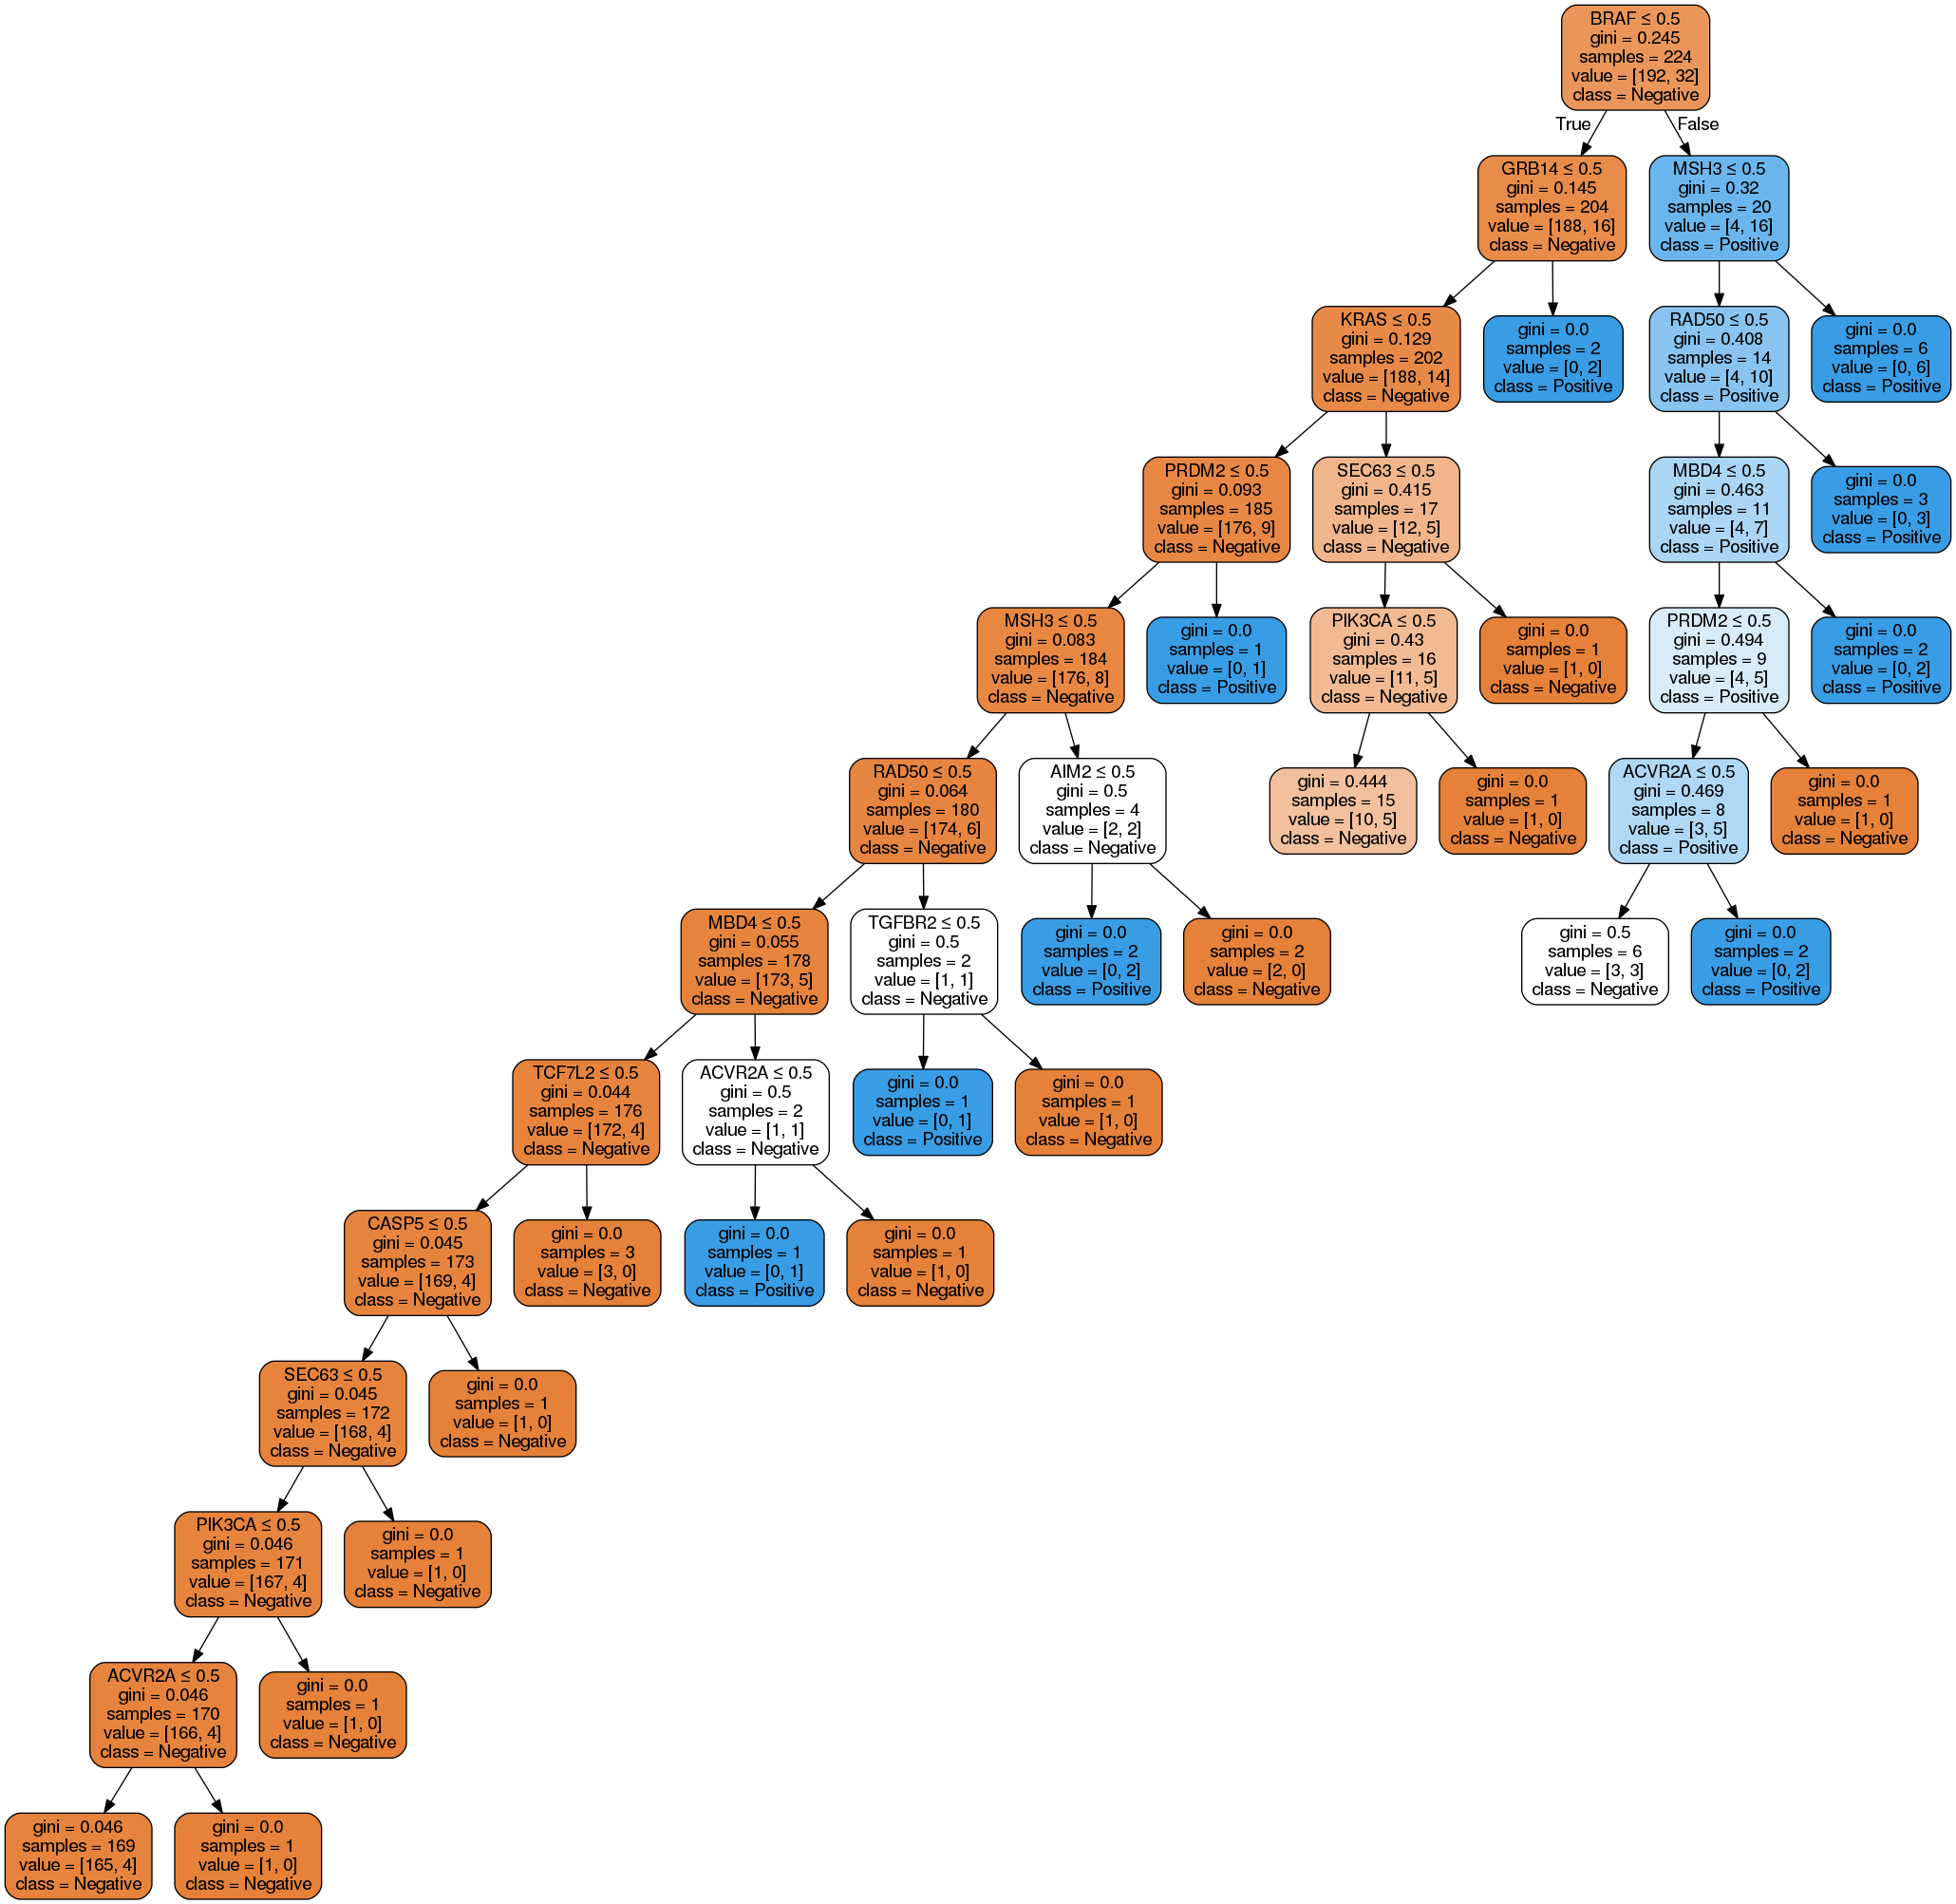

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=collabs, class_names=tarlabs)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())